# Recognizing movement intent in images
By: Francesco Civilini

This code uses deep learning to recognize the difference between images of fighting (Muay Thai) and dancing (Zouk).

In [1]:
# Jupyter parameters for plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
# Import packages
from fastai.vision import *
from fastai.metrics import error_rate
from IPython.display import Image

In [3]:
# Set a data path for image training sets
# Note that the slashes in Windows paths need to be opposite
data_path = 'C:/Users/fcivi/Dropbox/dl_course/lesson_work/lesson_1/zouk_recognizer/'

# Create a databunch (with appropriate batch size)
data = ImageDataBunch.from_folder(data_path, train='train', bs=4, valid='valid',
                                  size=224)

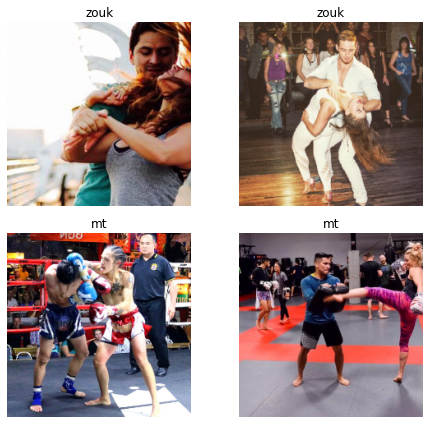

In [4]:
data.show_batch(rows=3, figsize=(7,6))

In [5]:
# Setup the learner
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [6]:
# Find the appropriate learning rate for our new layer
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


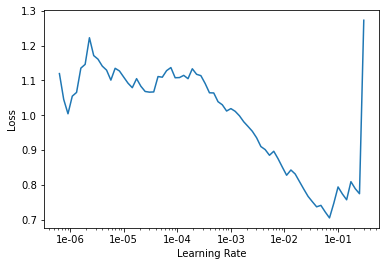

In [7]:
# See what accuracy was given by varied learning rates
learn.recorder.plot()

In [8]:
# Run the fit
learn.fit_one_cycle(3, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.884073,0.392768,0.777778,00:11
1,0.674324,0.248251,0.888889,00:10
2,0.473015,0.196648,0.888889,00:10


In [9]:
# Let's check what we got
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

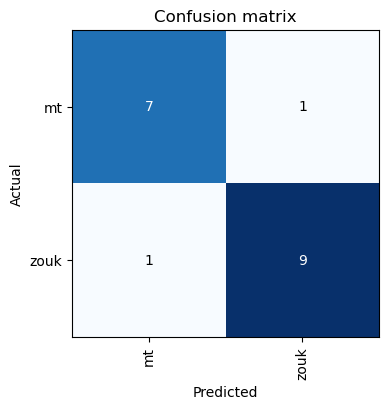

In [12]:
# Plot the confusion matrix
interp.plot_confusion_matrix(figsize=(4,4), dpi=100)

In [30]:
# Find out which files had incorrect predictions
losses,idxs = interp.top_losses(2)
for p in data.valid_ds.x.items[idxs]:
    print(p)

C:\Users\fcivi\Dropbox\dl_course\lesson_work\lesson_1\zouk_recognizer\valid\mt\mt_9.jpg
C:\Users\fcivi\Dropbox\dl_course\lesson_work\lesson_1\zouk_recognizer\valid\zouk\zouk_10.jpg


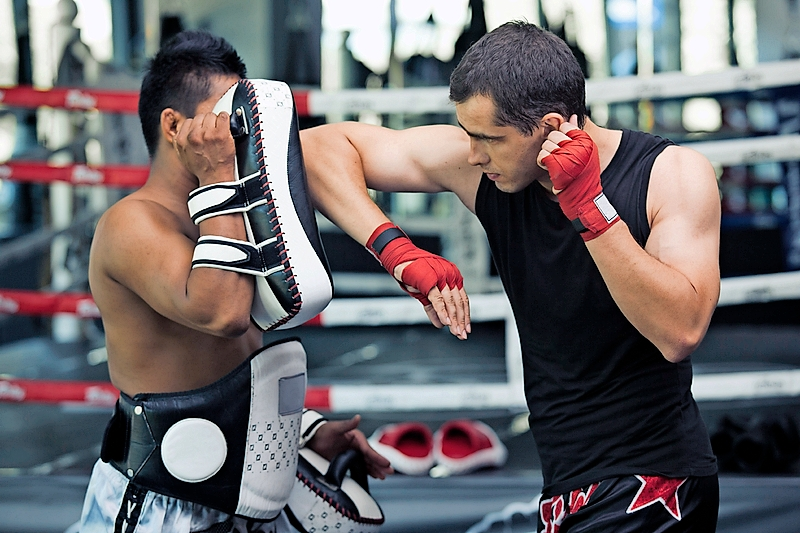

In [34]:
# This is the image that was incorrectly predicted as Zouk
Image(filename=data.valid_ds.x.items[idxs][0], width=300) 

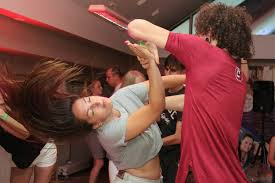

In [32]:
# This is the image that was incorrectly predicted as Muay Thai
Image(filename=data.valid_ds.x.items[idxs][1]) 